 **Eka Yahya Iskandar Syah** 

*1301190343*

# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [17]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt

Download the dataset and read it into a *pandas* dataframe.

In [18]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [19]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-19-5b807af711f8>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

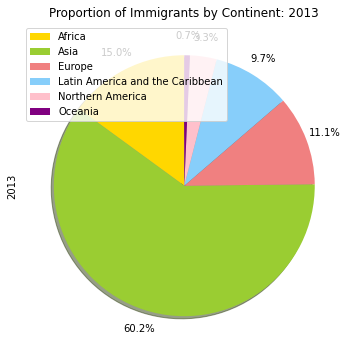

In [20]:
# filter data for year 2013
df_2013 = df_can.loc[:, ['Continent', '2013']]

# group data by continent and sum
continent_data = df_2013.groupby('Continent').sum()

# create a pie chart
continent_data.plot(kind='pie', 
                    y='2013',          # specify the column to plot
                    figsize=(10, 6),
                    autopct='%1.1f%%', # add percentage to each slice
                    startangle=90,     # start angle at 90° (Africa)
                    shadow=True,       # add shadow       
                    labels=None,        # turn off labels on pie chart
                    pctdistance=1.15,  # increase distance of percentage label from center of pie chart
                    colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink', 'purple']
                   )

# add legend
plt.legend(labels=continent_data.index, loc='upper left') 

# set title
plt.title('Proportion of Immigrants by Continent: 2013')

# show plot
plt.show()


**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [27]:
# filter data for Pakistan and Afghanistan and select years 1980 to 2013
df_PA = df_can.loc[['Pakistan', 'Afghanistan'], years].transpose()

# print the dataframe to the console
print(df_PA)


Country  Pakistan  Afghanistan
1980          978           16
1981          972           39
1982         1201           39
1983          900           47
1984          668           71
1985          514          340
1986          691          496
1987         1072          741
1988         1334          828
1989         2261         1076
1990         2470         1028
1991         3079         1378
1992         4071         1170
1993         4777          713
1994         4666          858
1995         4994         1537
1996         9125         2212
1997        13073         2555
1998         9068         1999
1999         9979         2395
2000        15400         3326
2001        16708         4067
2002        15110         3697
2003        13205         3479
2004        13399         2978
2005        14314         3436
2006        13127         3009
2007        10124         2652
2008         8994         2111
2009         7217         1746
2010         6811         1758
2011    

Step 2: Plot data.

Text(0.5, 0, 'Years')

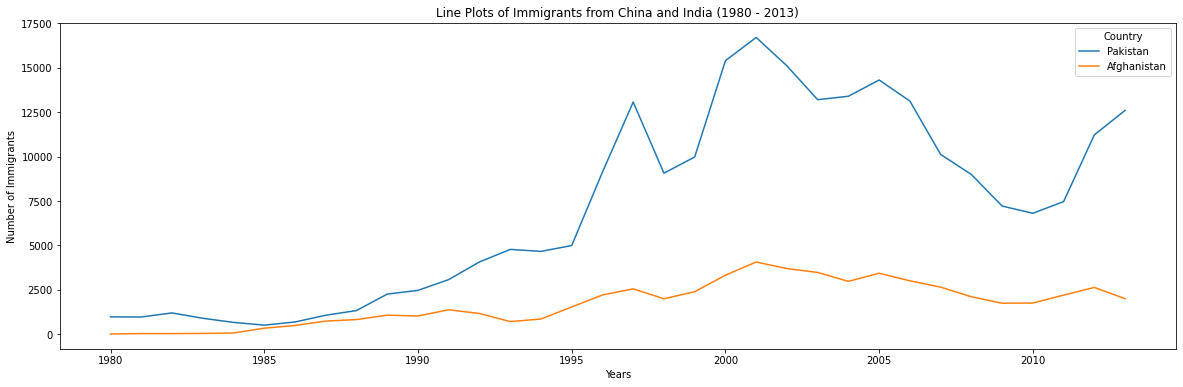

In [28]:
df_PA.plot(kind='line', figsize=(20, 6)) # add to subplot 2
plt.title ('Line Plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [29]:
# filter data for Pakistan and Afghanistan and select years 1980 to 2013
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

# print the dataframe to the console
print(df_countries)


         1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
Denmark   272   293   299   106    93    73    93   109   129   129  ...   
Norway    116    77   106    51    31    54    56    80    73    76  ...   
Sweden    281   308   222   176   128   158   187   198   171   182  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
Denmark    89    62   101    97   108    81    92    93    94    81  
Norway     73    57    53    73    66    75    46    49    53    59  
Sweden    129   205   139   193   165   167   159   134   140   140  

[3 rows x 34 columns]


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

In [31]:
df_total = pd.DataFrame(df_countries.sum(axis=0))

df_total.reset_index(inplace=True)

df_total.columns = ['year', 'total']

print(df_total)



    year  total
0   1980    669
1   1981    678
2   1982    627
3   1983    333
4   1984    252
5   1985    285
6   1986    336
7   1987    387
8   1988    373
9   1989    387
10  1990    331
11  1991    381
12  1992    411
13  1993    481
14  1994    345
15  1995    352
16  1996    301
17  1997    338
18  1998    217
19  1999    287
20  2000    287
21  2001    343
22  2002    293
23  2003    327
24  2004    291
25  2005    324
26  2006    293
27  2007    363
28  2008    339
29  2009    323
30  2010    297
31  2011    276
32  2012    287
33  2013    280


**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [32]:
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI_norm = (df_CI - df_CI.min()) / (df_CI.max() - df_CI.min())
print(df_CI_norm)





Country     China     India
1980     0.087586  0.145911
1981     0.125557  0.139348
1982     0.043379  0.123004
1983     0.008184  0.097722
1984     0.000000  0.046658
1985     0.007039  0.000000
1986     0.010546  0.091847
1987     0.027182  0.186818
1988     0.029983  0.228476
1989     0.068100  0.191631
1990     0.159510  0.244695
1991     0.310008  0.297603
1992     0.226977  0.295697
1993     0.201914  0.540173
1994     0.282558  0.450295
1995     0.313491  0.446201
1996     0.435687  0.614019
1997     0.461505  0.564299
1998     0.475485  0.407200
1999     0.695180  0.461358
2000     0.828166  0.761305
2001     0.850208  0.844151
2002     0.741262  0.864965
2003     0.850330  0.717022
2004     0.854714  0.750773
2005     1.000000  1.000000
2006     0.779185  0.926185
2007     0.636067  0.766618
2008     0.694400  0.751586
2009     0.684293  0.788931
2010     0.703023  0.938279
2011     0.657013  0.728085
2012     0.767153  0.835089
2013     0.794067  0.902403


Step 2: Generate the bubble plots.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


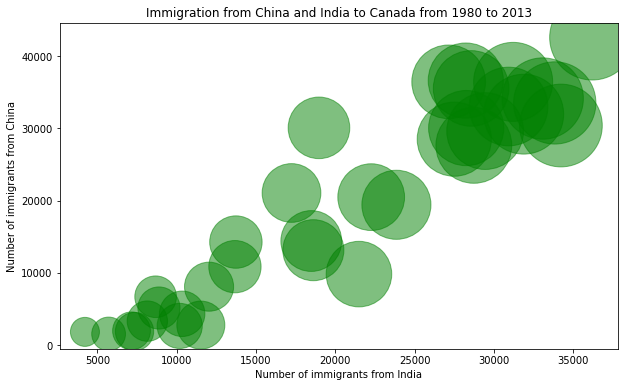

In [33]:
ax = df_CI.plot(kind='scatter', x='India', y='China', figsize=(10, 6), alpha=0.5, color='green', s=df_CI['India']*0.2)

ax.set_title('Immigration from China and India to Canada from 1980 to 2013')
ax.set_xlabel('Number of immigrants from India')
ax.set_ylabel('Number of immigrants from China')

plt.show()



# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).